In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import metrics

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [4]:
Y = df['custcat'].values

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [7]:
k = 4 

model = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
Y_Predict = model.predict (X_test)

print("k=4 Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("k=4 Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_Predict))
print()

k = 5 

model = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
Y_Predict = model.predict (X_test)

print("k=5 Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("k=5 Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_Predict))
print()

k = 6 

model = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
Y_Predict = model.predict (X_test)

print("k=6 Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("k=6 Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_Predict))

k=4 Train set Accuracy:  0.565
k=4 Test set Accuracy:  0.34

k=5 Train set Accuracy:  0.5475
k=5 Test set Accuracy:  0.32

k=6 Train set Accuracy:  0.525
k=6 Test set Accuracy:  0.315


###Crossvalidation with validatiaon set


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k = 6

model = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring = 'accuracy')

print("cross_val_score: ", scores)
print("cross_val_score's mean: ", scores.mean())

cross_val_score:  [0.33125 0.3     0.3     0.36875 0.29375]
cross_val_score's mean:  0.31875


Finding the optimal K with crossvalidation

[0.2575, 0.28, 0.29874999999999996, 0.32625000000000004, 0.32875, 0.31875, 0.31625, 0.30625, 0.3225, 0.32125, 0.33375, 0.32875, 0.3375, 0.34625, 0.35124999999999995, 0.3637499999999999, 0.3662500000000001, 0.36500000000000005, 0.35625, 0.36124999999999996, 0.37374999999999997, 0.3825, 0.36375, 0.3662500000000001, 0.36624999999999996, 0.3662500000000001, 0.35625, 0.37, 0.3675]


Text(0, 0.5, 'Cross-validated accuracy')

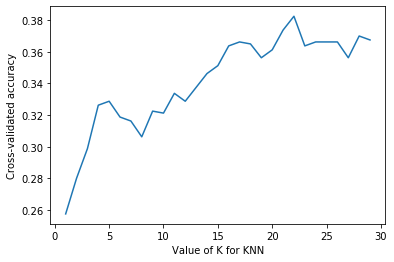

In [9]:
k_range = range(1, 30)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring ='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [10]:
model = KNeighborsClassifier(n_neighbors=18).fit(X_train, Y_train)
Y_Predict = model.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_Predict))

Train set Accuracy:  0.45
Test set Accuracy:  0.36


#Bootstrapping
we have 1000data and crossvalided..
now we can create from these 1000data to make extra 10000 samples and then apply KNN to see if the bootstrapping would pretell what we can collect more data or something else. 

In [11]:
df1 = pd.read_csv('teleCust1000t.csv')
df1.head()
df1

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [12]:
X1 = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
Y1 = df['custcat'].values

print(X1.shape)
print(Y1.shape)

X1[0:5]

(1000, 11)
(1000,)


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

creating bootstrap data!!! based on the 1000 data --> 10,000data 

In [13]:
from astropy.stats import bootstrap
from astropy.utils import NumpyRNGContext

with NumpyRNGContext(1):
    boot_sample_X1 = bootstrap(X1, 10)
    boot_sample_Y1 = bootstrap(Y1, 10)

In [14]:
boot_sample_Y1.shape

(10, 1000)

In [15]:
reshaped_boot_sample_X1 = boot_sample_X1.reshape(10000,11)
reshaped_boot_sample_Y1 = boot_sample_Y1.reshape(10000,1)

In [16]:
reshaped_boot_sample_Y1.shape

(10000, 1)

In [17]:
reshaped_boot_sample_X1[0:5]

array([[  1.,  44.,  57.,   1.,   1., 186.,   2.,  17.,   0.,   0.,   2.],
       [  2.,  53.,  57.,   0.,  25.,  37.,   1.,   7.,   0.,   0.,   1.],
       [  3.,   5.,  39.,   0.,   0.,  22.,   1.,   0.,   0.,   1.,   2.],
       [  1.,  20.,  42.,   0.,   4.,  17.,   3.,   5.,   0.,   0.,   1.],
       [  2.,  30.,  74.,   1.,  12.,  10.,   1.,   3.,   1.,   1.,   2.]])

In [18]:
normalized_reshaped_boot_sample_X1 = preprocessing.StandardScaler().fit(reshaped_boot_sample_X1).transform(reshaped_boot_sample_X1.astype(float))

In [19]:
normalized_reshaped_boot_sample_X1[0:5]

array([[-1.24948969,  0.39684313,  1.21657034,  1.00420886, -1.05802544,
         0.96141655, -0.52990172,  0.59874756, -0.22577012, -1.0502616 ,
        -0.23461082],
       [-0.0244998 ,  0.81733669,  1.21657034, -0.99580878,  1.31664706,
        -0.36815595, -1.3418872 , -0.39881589, -0.22577012, -1.0502616 ,
        -0.93327319],
       [ 1.2004901 , -1.42529562, -0.22222138, -0.99580878, -1.15697012,
        -0.50200553, -1.3418872 , -1.09711031, -0.22577012,  0.95214374,
        -0.23461082],
       [-1.24948969, -0.72447303,  0.01757724, -0.99580878, -0.76119137,
        -0.54662205,  0.28208375, -0.59832859, -0.22577012, -1.0502616 ,
        -0.93327319],
       [-0.0244998 , -0.25725796,  2.57542919,  1.00420886,  0.03036612,
        -0.60908519, -1.3418872 , -0.79784128,  4.42928399,  0.95214374,
        -0.23461082]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(normalized_reshaped_boot_sample_X1, reshaped_boot_sample_Y1, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (8000, 11) (8000, 1)
Test set: (2000, 11) (2000, 1)


Text(0, 0.5, 'Cross-validated accuracy')

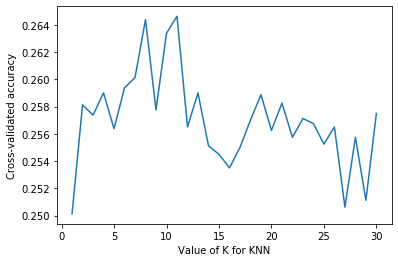

In [21]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring ='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

------------------------------

### Assignment
Now you know the best k with bootstrap data  
Your next job is to train your model (with the best k) with the real data (800)  
Please correct the following codes.  
Due to by next week. 

In [22]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [24]:
model = KNeighborsClassifier(n_neighbors=9).fit(X_train, Y_train)

Y_Predict = model.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_Predict))
#you have to use the origianl data (without the bootstrap data)
#In clocusion, your final model should be appricable to the origianl data (800) without the faked bootstrap data

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


----------------------------------------------------------------------------------------------------------------------------

#SKLEARN for bootstrap

In [25]:
new_Data = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside', 'custcat']].values 

In [26]:
new_Data[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [27]:
from sklearn.utils import resample

boot_Data = resample(new_Data, n_samples =100, replace = True, random_state = 7)

In [28]:
boot_Data[0:5]

array([[  3.,   7.,  24.,   0.,   5.,  29.,   2.,   3.,   0.,   0.,   3.,
          1.],
       [  2.,  22.,  43.,   0.,   4., 114.,   2.,  19.,   0.,   0.,   1.,
          1.],
       [  3.,  55.,  45.,   0.,   8.,  36.,   2.,   9.,   0.,   0.,   3.,
          3.],
       [  2.,  22.,  39.,   0.,   0.,  63.,   4.,   9.,   0.,   0.,   1.,
          2.],
       [  1.,  13.,  34.,   1.,   6.,  37.,   3.,   6.,   0.,   0.,   4.,
          3.]])

In [29]:
X = np.vstack((new_Data, boot_Data))
X.shape

(1100, 12)

In [30]:
X1 = X[0:1100, 0:11]

In [31]:
Y = X[0:1100, 11]

In [32]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))
X1.shape

(1100, 11)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=0)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (880, 11) (880,)
Test set: (220, 11) (220,)


In [34]:
k = 13
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring = 'accuracy')

print(scores)
print(scores.mean())

[0.32954545 0.35795455 0.39204545 0.36931818 0.41477273]
0.37272727272727274


Text(0, 0.5, 'Cross-validated accuracy')

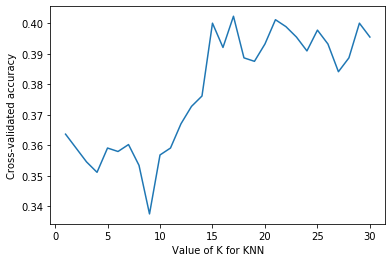

In [35]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(neigh, X_train, Y_train, cv = 5, scoring ='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [36]:
model = KNeighborsClassifier(n_neighbors = 20).fit(X_train,Y_train)
Y_Predict = model.predict(X_test)

In [37]:
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_Predict))

Train set Accuracy:  0.4590909090909091
Test set Accuracy:  0.40454545454545454


----

### Assignment  
- Apply both cross-validation and bootstrapping method (astophysics, the bootstrap function) for the log-linear data (in our previous lectures)  
Due to by next week. 

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
df = pd.read_csv('teleCust1000t.csv')

In [40]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
Y = df['custcat'].values

In [41]:
with NumpyRNGContext(1):
    boot_sample_X = bootstrap(X, 10)
    boot_sample_Y = bootstrap(Y, 10)

In [42]:
reshaped_boot_sample_X = boot_sample_X.reshape(10000,11)
reshaped_boot_sample_Y = boot_sample_Y.reshape(10000,1)

In [43]:
normalized_reshaped_boot_sample_X = preprocessing.StandardScaler().fit(reshaped_boot_sample_X).transform(reshaped_boot_sample_X.astype(float))

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_reshaped_boot_sample_X, reshaped_boot_sample_Y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (8000, 11) (8000, 1)
Test set: (2000, 11) (2000, 1)


In [45]:
linear = LogisticRegression().fit(X_train, Y_train)

Y_Predict = linear.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, linear.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_Predict))

Train set Accuracy:  0.283875
Test set Accuracy:  0.291


In [46]:
df2 = pd.read_csv('teleCust1000t.csv')

In [47]:
X1 = df2[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
Y1 = df2['custcat'].values

In [48]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [50]:
linear = LogisticRegression()
linear.fit(X_train, Y_train)
scores = cross_val_score(linear, X_train, Y_train, cv=5, scoring = 'accuracy')

print("cross_val_score: ", scores)
print("cross_val_score's mean: ", scores.mean())

cross_val_score:  [0.43125 0.38125 0.3875  0.44375 0.45   ]
cross_val_score's mean:  0.41875


----------